In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv


### ✏️ Target Data : Rent 

In [2]:
df = pd.read_csv('/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv')
df

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,"Al Huboob 1, Al Salamah, Umm Al Quwain",14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Al Salamah,Umm Al Quwain,25.493412,55.575994
73738,"Umm Al Quwain Marina, Umm Al Quwain",14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527
73739,"King Faisal Street, Umm Al Quwain",50000,3,4,Apartment,2000,25.000000,Low,Yearly,Unfurnished,For Rent,2024-01-02,110,King Faisal Street,Umm Al Quwain,NaN,NaN
73740,"Al Maqtaa, Umm Al Quwain",37000,1,2,Apartment,989,37.411527,Low,Yearly,Unfurnished,For Rent,2023-10-23,181,Al Maqtaa,Umm Al Quwain,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [4]:
df = df.dropna()
df.isna().sum()

Address                   0
Rent                      0
Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Location                  0
City                      0
Latitude                  0
Longitude                 0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
pre_df = df.copy()

In [7]:
pre_df = pre_df.reset_index(drop=True)

In [8]:
int_columns = pre_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
pre_df = pre_df[int_columns]
pre_df

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude
0,124000,3,4,1785,69.467787,45,24.493598,54.407841
1,140000,3,4,1422,98.452883,44,24.494022,54.607372
2,99000,2,3,1314,75.342466,31,24.485931,54.600939
3,220000,3,4,3843,57.246942,57,24.493598,54.407841
4,350000,5,7,6860,51.020408,65,24.494022,54.607372
...,...,...,...,...,...,...,...,...
73018,10000,0,1,249,40.160643,134,25.493412,55.575994
73019,25000,1,1,500,50.000000,142,25.511461,55.578804
73020,22000,2,2,1000,22.000000,26,25.527959,55.606527
73021,14000,0,1,419,33.412888,129,25.493412,55.575994


array([[<Axes: title={'center': 'Rent'}>,
        <Axes: title={'center': 'Beds'}>,
        <Axes: title={'center': 'Baths'}>],
       [<Axes: title={'center': 'Area_in_sqft'}>,
        <Axes: title={'center': 'Rent_per_sqft'}>,
        <Axes: title={'center': 'Age_of_listing_in_days'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

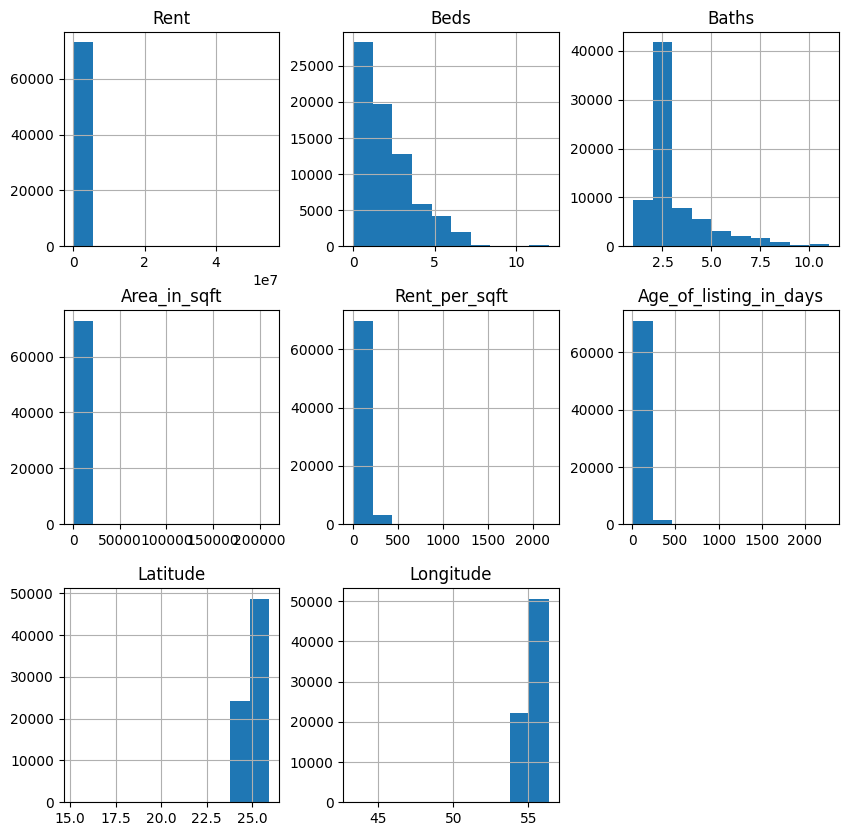

In [9]:
pre_df.hist(figsize=(10,10))

In [10]:
pre_df.Rent.value_counts()

Rent
120000    1654
75000     1619
150000    1615
110000    1549
85000     1465
          ... 
69950        1
164778       1
128999       1
179779       1
48997        1
Name: count, Length: 2094, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_df.iloc[:,1:], pre_df.iloc[:,0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [12]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error

def get_evaluation(y_test, prediction) :
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
#     MSLE = mean_squared_log_error(y_test, prediction)
#     RMSE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [13]:
prediction = l_r.predict(X_test)

In [14]:
get_evaluation(y_test, prediction)

MSE: 28012732899.5329, RMSE: 167370.0478, R2: 0.4876


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = pre_df.iloc[:,1:], pre_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=105)

dt_r = DecisionTreeRegressor(random_state=105)
rf_r = RandomForestRegressor(random_state=105, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=105)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 1916238011.9176, RMSE: 43774.8559, R2: 0.9650
RandomForestRegressor
MSE: 11427435269.5240, RMSE: 106899.1827, R2: 0.7910
GradientBoostingRegressor
MSE: 5272110091.2269, RMSE: 72609.2976, R2: 0.9036
XGBRegressor
MSE: 2755612438.2548, RMSE: 52493.9276, R2: 0.9496
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1233
[LightGBM] [Info] Number of data points in the train set: 58418, number of used features: 7
[LightGBM] [Info] Start training from score 148639.264747
LGBMRegressor
MSE: 3707505256.5416, RMSE: 60889.2869, R2: 0.9322


In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

features, targets = pre_df.iloc[:,1:], pre_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=105)

p_r = LinearRegression()
p_r.fit(X_train, y_train)

LinearRegression()

In [17]:
prediction = p_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 1766815.0017, RMSE: 1329.2159, R2: 1.0000


### 💡 다항회귀 기법을 사용하였을 때 가장 높은 점수가 나왔다.
#### 📌 비선형적인 데이터 패턴을 가지고 있음을 알 수 있다.

In [18]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:, 1:], pre_df.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   Rent   R-squared (uncentered):                   0.503
Model:                            OLS   Adj. R-squared (uncentered):              0.503
Method:                 Least Squares   F-statistic:                          1.055e+04
Date:                Sat, 04 May 2024   Prob (F-statistic):                        0.00
Time:                        05:23:42   Log-Likelihood:                     -1.0086e+06
No. Observations:               73023   AIC:                                  2.017e+06
Df Residuals:                   73016   BIC:                                  2.017e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [20]:
get_vif(features)

,vif_score,feature
0,8.074916,Beds
1,8.759968,Baths
2,2.314279,Area_in_sqft
3,3.028440,Rent_per_sqft
4,2.077608,Age_of_listing_in_days
5,6600.102671,Latitude
6,6641.477570,Longitude


#### ✏️ Start Data Preprocessing 

In [21]:
pre_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rent,73023.0,148372.314463,308265.238177,0.000000,54999.000000,98000.000000,170000.000000,5.500000e+07
Beds,73023.0,2.154458,1.571260,0.000000,1.000000,2.000000,3.000000,1.200000e+01
Baths,73023.0,2.638771,1.620881,1.000000,2.000000,2.000000,3.000000,1.100000e+01
Area_in_sqft,73023.0,2035.634471,2976.159891,74.000000,850.000000,1329.000000,2101.000000,2.102540e+05
Rent_per_sqft,73023.0,88.537296,66.627532,0.000000,40.000000,71.813285,119.047619,2.182045e+03
Age_of_listing_in_days,73023.0,73.884735,71.837749,11.000000,30.000000,51.000000,95.000000,2.276000e+03
Latitude,73023.0,24.918929,0.569356,15.175847,24.493598,25.078641,25.197978,2.592031e+01
Longitude,73023.0,55.053133,0.653722,43.351928,54.607372,55.238209,55.367138,5.636129e+01


In [22]:
rent_df = pre_df.loc[:,'Rent'].reset_index()
rent_df

,index,Rent
0,0,124000
1,1,140000
2,2,99000
3,3,220000
4,4,350000
...,...,...
73018,73018,10000
73019,73019,25000
73020,73020,22000
73021,73021,14000


In [23]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_rent = std.fit_transform(rent_df[['Rent']])
std_rent

array([[-0.07906335],
       [-0.02715964],
       [-0.16016289],
       ...,
       [-0.4099495 ],
       [-0.43590135],
       [-0.43590135]])

In [24]:
rent_df['Rent'] = std_rent
rent_df

,index,Rent
0,0,-0.079063
1,1,-0.027160
2,2,-0.160163
3,3,0.232359
4,4,0.654077
...,...,...
73018,73018,-0.448877
73019,73019,-0.400218
73020,73020,-0.409949
73021,73021,-0.435901


In [25]:
a1 = rent_df['Rent'] >= -1.96
a2 = rent_df['Rent'] <= 1.96
a = a1 & a2
pre_df = pre_df.loc[pre_df[a].index].reset_index(drop=True)

In [26]:
pre_df = pre_df.reset_index(drop=True)
pre_df

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude
0,124000,3,4,1785,69.467787,45,24.493598,54.407841
1,140000,3,4,1422,98.452883,44,24.494022,54.607372
2,99000,2,3,1314,75.342466,31,24.485931,54.600939
3,220000,3,4,3843,57.246942,57,24.493598,54.407841
4,350000,5,7,6860,51.020408,65,24.494022,54.607372
...,...,...,...,...,...,...,...,...
71981,10000,0,1,249,40.160643,134,25.493412,55.575994
71982,25000,1,1,500,50.000000,142,25.511461,55.578804
71983,22000,2,2,1000,22.000000,26,25.527959,55.606527
71984,14000,0,1,419,33.412888,129,25.493412,55.575994


<Axes: >

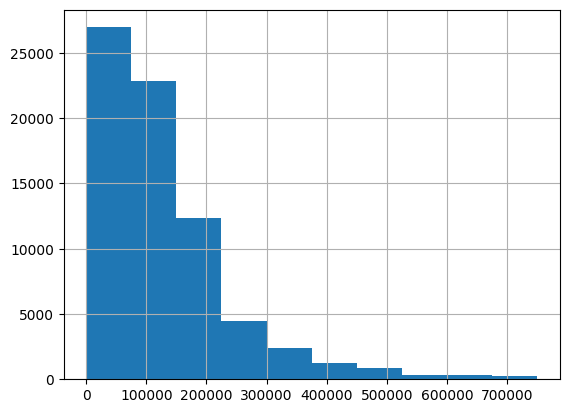

In [27]:
pre_df['Rent'].hist()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_df.iloc[:,1:], pre_df.iloc[:,0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [29]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 2860442164.8775, RMSE: 53483.1017, R2: 0.7439


### ✨ Better than before preprocessing

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = pre_df.iloc[:,1:], pre_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=105)

dt_r = DecisionTreeRegressor(random_state=105)
rf_r = RandomForestRegressor(random_state=105, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=105)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 45376225.7451, RMSE: 6736.1878, R2: 0.9959
RandomForestRegressor
MSE: 16486087.5907, RMSE: 4060.3063, R2: 0.9985
GradientBoostingRegressor
MSE: 88048954.3703, RMSE: 9383.4404, R2: 0.9921
XGBRegressor
MSE: 45604502.5577, RMSE: 6753.1106, R2: 0.9959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1233
[LightGBM] [Info] Number of data points in the train set: 57588, number of used features: 7
[LightGBM] [Info] Start training from score 128232.096965
LGBMRegressor
MSE: 36133944.6867, RMSE: 6011.1517, R2: 0.9968


In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

features, targets = pre_df.iloc[:,1:], pre_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=105)

p_r = LinearRegression()
p_r.fit(X_train, y_train)

LinearRegression()

In [32]:
prediction = p_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 112684.7029, RMSE: 335.6854, R2: 1.0000


### 📌 타겟데이터에 대한 이상치 제거 후 회귀분석 결과 성능이 매우 높아진것을 확인 

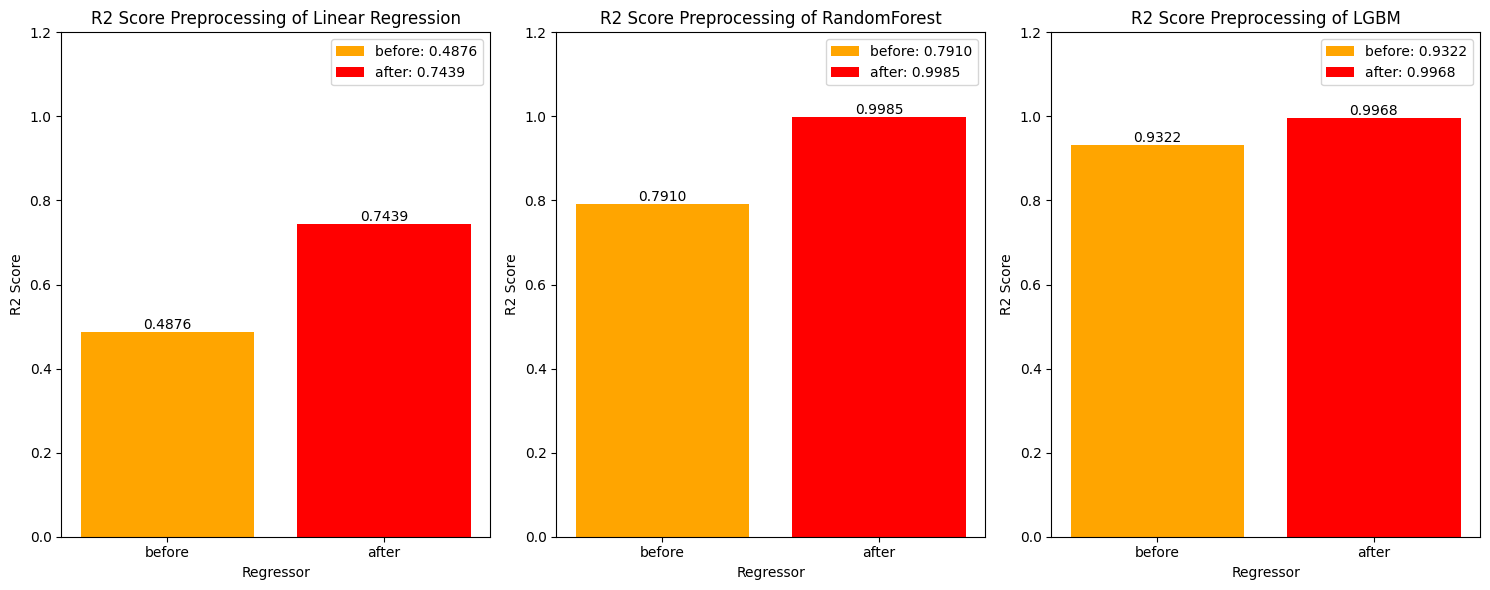

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

colors = ['orange', 'red']
linear = [0.4876, 0.7439]
rfc = [0.7910, 0.9985]
lgbm = [0.9322, 0.9968]

regressor = ['before', 'after']

for i, (method, scores) in enumerate(zip(['Linear Regression', 'RandomForest', 'LGBM'], [linear, rfc, lgbm])):
    for j, score in enumerate(scores):
        axes[i].bar(regressor[j], score, color=colors[j], label=f'{regressor[j]}: {score:.4f}')
        axes[i].text(j, score, f'{score:.4f}', color='black', ha='center', va='bottom')
    axes[i].set_xlabel('Regressor')
    axes[i].set_ylabel('R2 Score')
    axes[i].set_title(f'R2 Score Preprocessing of {method}')
    axes[i].set_ylim(0, 1.2) 
    axes[i].legend()

plt.tight_layout() 

plt.show()
